In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data = pd.read_csv(r'C:\Users\razi\Downloads\Country-data.csv')

In [104]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [105]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [157]:
data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)

In [158]:
df = data.iloc[:,1:10]
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


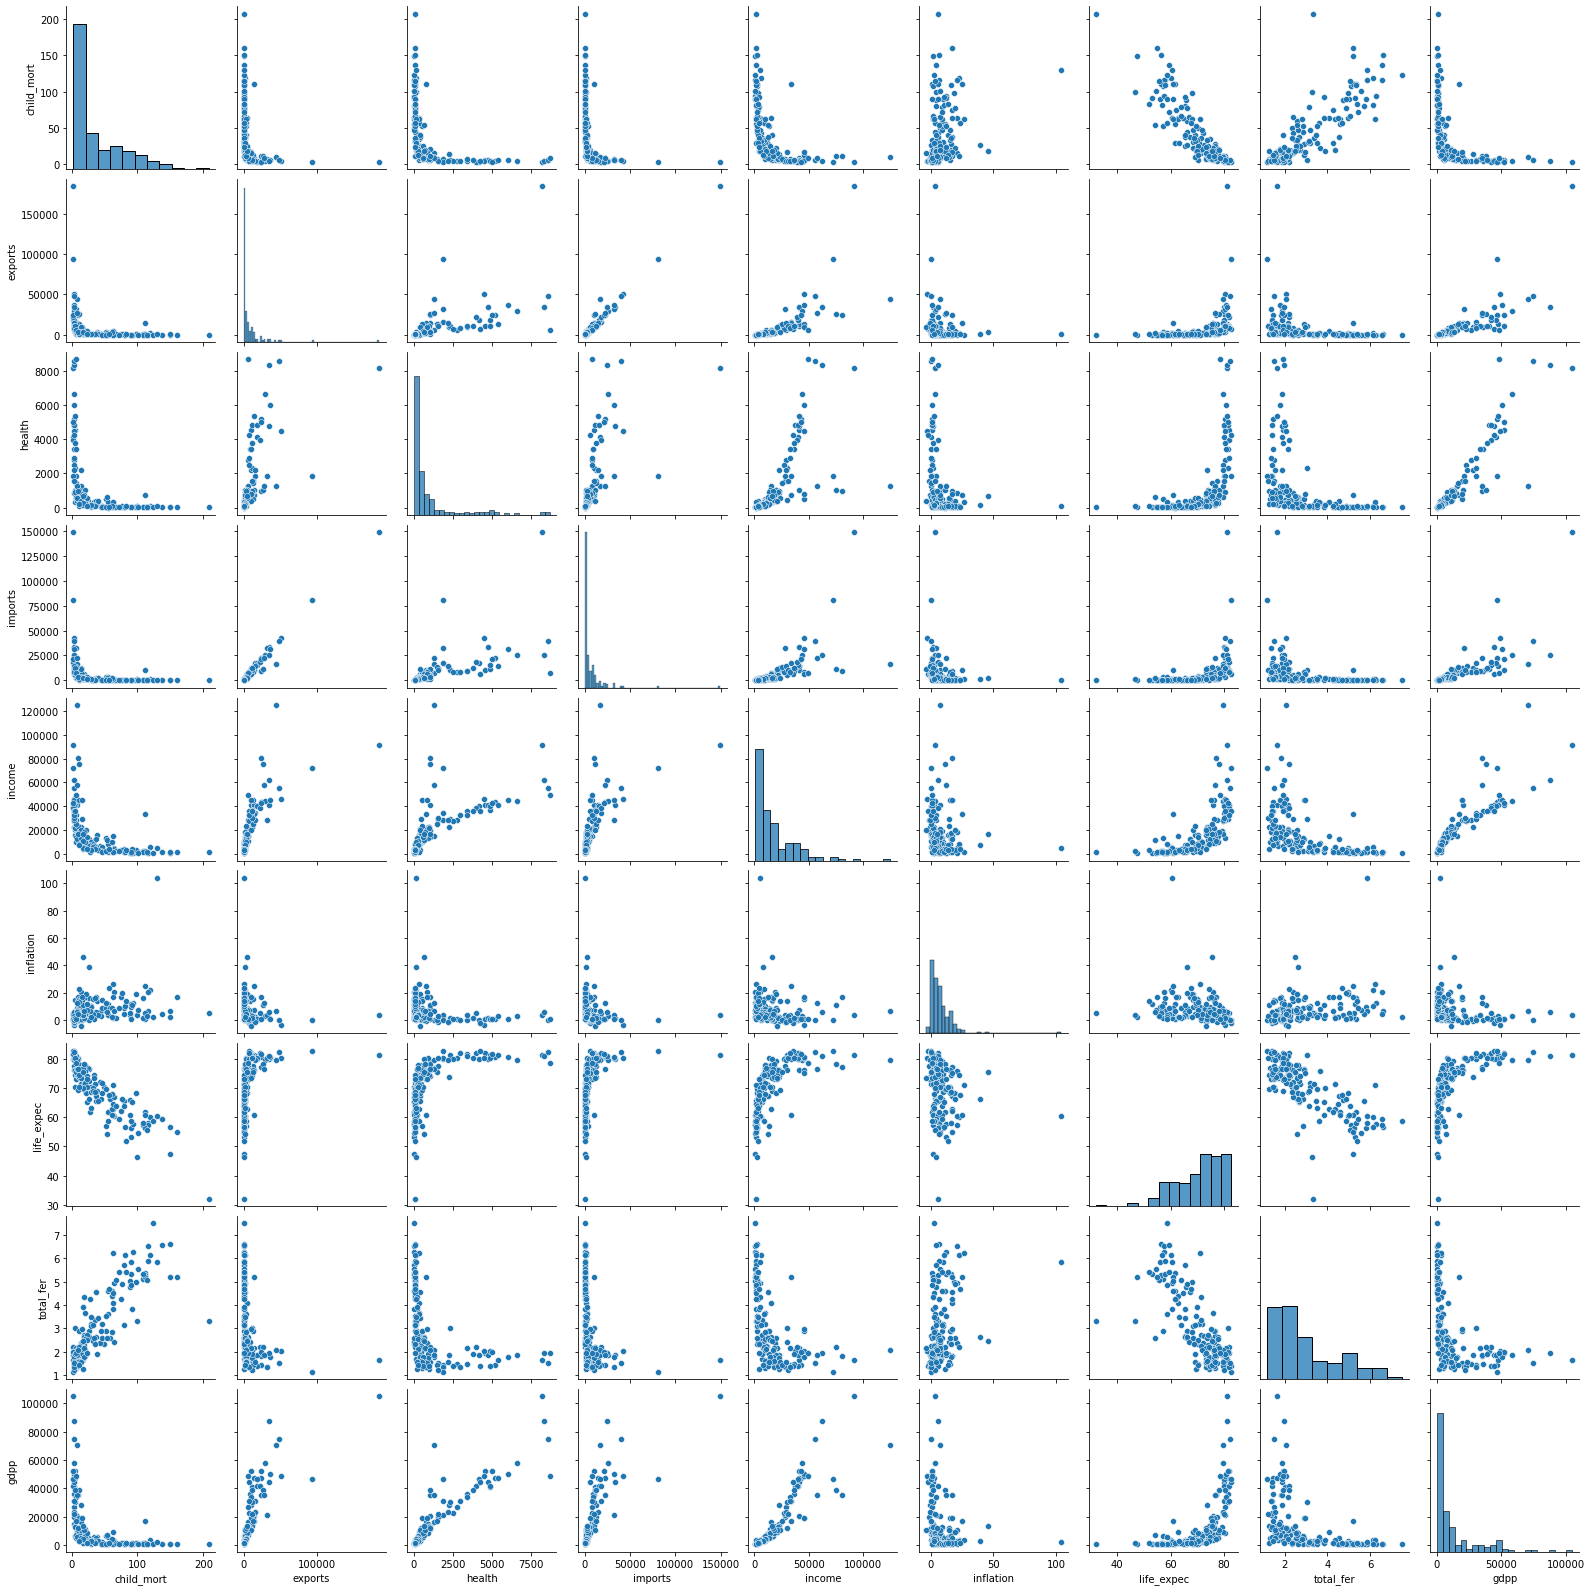

In [159]:
sns.pairplot(df)

In [160]:
import warnings
warnings.filterwarnings('ignore')

207550045812.1418
97298603641.26045
48518724638.32125
32593397832.405396
25160636433.712345
20138651788.6038
14747816388.432257
11628465210.404196
8905124208.876537
7289545915.3781395


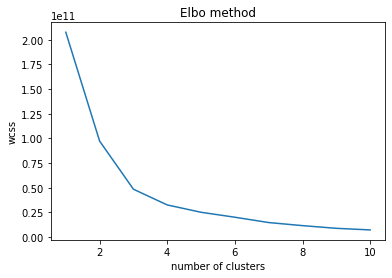

In [161]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbo method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [162]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(int)

In [163]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df)
km=model_kmeans.predict(df)
print(model_kmeans.labels_)

[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [164]:
df['Cluster_ID']= pd.Series(km)
data['Cluster_ID']= pd.Series(km)

In [165]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553,0
1,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090,0
2,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460,0
3,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530,0
4,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200,0


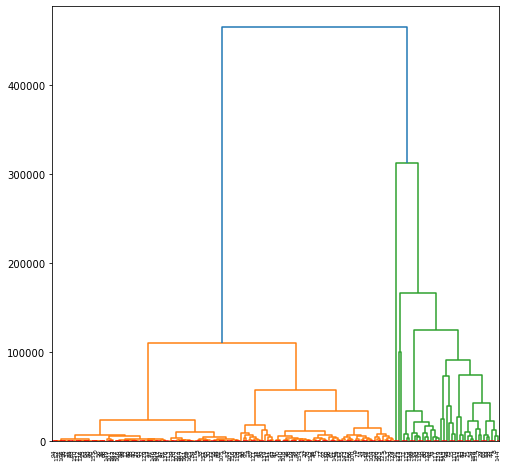

In [169]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(df,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

In [171]:
model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(df)
labels_sc = model_kmeans.predict(df)
print(labels_sc)

[1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 2 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


In [172]:
df['AHC_ClusterID']= pd.Series(labels_sc)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,AHC_ClusterID
0,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553,0,1
1,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090,0,1
2,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460,0,1
3,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530,0,1
4,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200,0,1


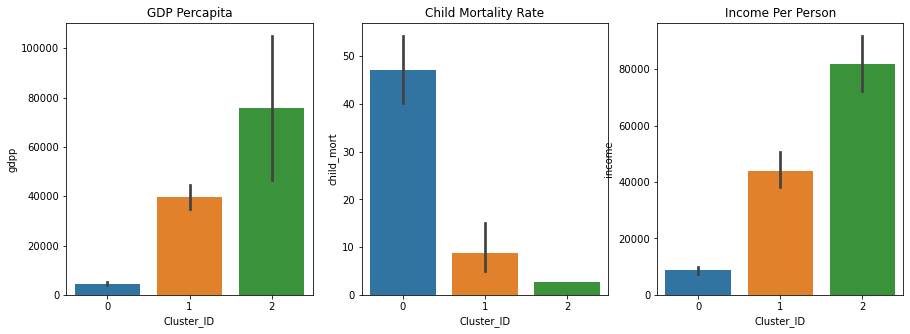

In [175]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'Cluster_ID', y = 'gdpp', data= df)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'Cluster_ID', y = 'child_mort', data= df)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'Cluster_ID', y = 'income', data= df)
plt.title('Income Per Person')
plt.show()

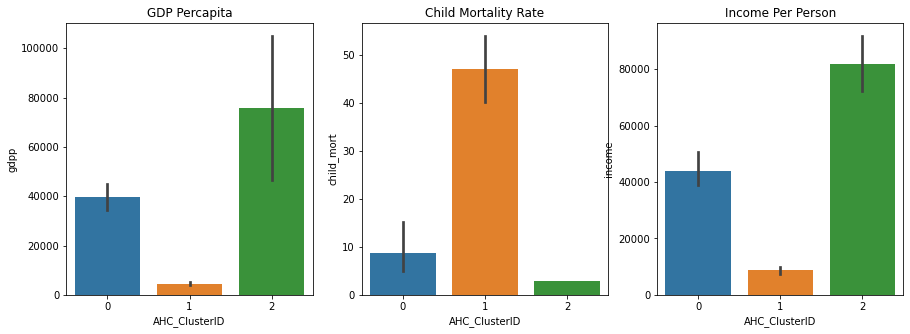

In [176]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'AHC_ClusterID', y = 'gdpp', data= df)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'AHC_ClusterID', y = 'child_mort', data= df)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'AHC_ClusterID', y = 'income', data= df)
plt.title('Income Per Person')
plt.show()

In [111]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label=cluster.fit_predict(df)
label

array([0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0], dtype=int64)

In [153]:
df.Cluster_ID.value_counts()

0    75
2    59
1    33
Name: Cluster_ID, dtype: int64

In [155]:
df_new =  df.groupby(['Cluster_ID']).mean()
df_new

df_new['No of countries']=data.groupby('Cluster_ID')['country'].count()
df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,No of countries
Cluster_ID,,,,,,,,,,
0,55.944000,33.985320,5.864267,42.316879,8582.213333,11.102413,66.629333,3.553467,3459.693333,75
1,10.545455,42.875758,9.866667,45.257576,34696.060606,3.503455,78.403030,2.103333,38552.121212,33
2,31.310169,49.176271,6.318644,53.616949,18212.322034,5.953746,71.157627,2.650678,10734.186441,59


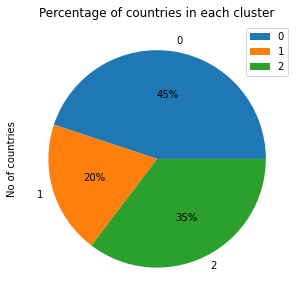

In [156]:
df_new.plot.pie(y='No of countries', figsize=(5,5),autopct='%1.0f%%',title='Percentage of countries in each cluster')
plt.show()

In [142]:
Underdeveloped_KMeancluster = data[data['Cluster_ID']== 1]
Underdeveloped_countries  = Underdeveloped_KMeancluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])

Underdeveloped_countries['country'].values

array(['Kiribati', 'Micronesia, Fed. Sts.', 'Vanuatu', 'Timor-Leste',
       'Venezuela', 'Barbados', 'Portugal', 'Slovenia', 'Greece',
       'Bahamas', 'Israel', 'Spain', 'Cyprus', 'New Zealand', 'Italy',
       'United Kingdom', 'France', 'Germany', 'Iceland', 'Belgium',
       'Japan', 'Finland', 'Austria', 'Canada', 'United States',
       'Ireland', 'Netherlands', 'Australia', 'Sweden', 'Denmark',
       'Switzerland', 'Norway', 'Luxembourg'], dtype=object)